In [ ]:
pip install -U libsvm-official

  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.35.0-cp311-cp311-linux_x86_64.whl size=124210 sha256=ca855e6ab7d1f5ade0c91382dc9f69d72ca1d5929c1175266ed4eca07e1aacfc
  Stored in directory: /root/.cache/pip/wheels/cb/1b/c2/e2bf699257a3150a4c54c95e6efe70586ea1a4d97e71619076
Successfully built libsvm-official


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy scikit-learn

In [ ]:
!pip install -U scipy
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from libsvm.svmutil import *

#load dataset
df = pd.read_csv("H_Comments.csv")
#extract text and lables
df.dropna(subset=['Toxicity'], inplace=True)
texts = df['Comment'].astype(str).tolist()
labels = df['Toxicity'].tolist()

# Split data
X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=20)

# ----------- Method 1: TF-IDF + LIBSVM -----------
print("\n=== TF-IDF + LIBSVM ===")

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_texts)
X_test_tfidf = vectorizer.transform(X_test_texts)

# Convert to LIBSVM format
X_train_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
X_test_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

# Train and predict using LIBSVM
prob1 = svm_problem(y_train, X_train_tfidf_libsvm)
param1 = svm_parameter('-t 0 -c 1')  # Linear kernel
model1 = svm_train(prob1, param1)
p_label1, _, _ = svm_predict(y_test, X_test_tfidf_libsvm, model1)

# Evaluate
f1_tfidf = f1_score(y_test, p_label1)
acc_tfidf = accuracy_score(y_test, p_label1)
print(f"F1 Score (TF-IDF): {f1_tfidf:.4f}")
print(f"Accuracy (TF-IDF): {acc_tfidf:.4f}")


=== TF-IDF + LIBSVM ===
Accuracy = 78.3463% (2511/3205) (classification)
F1 Score (TF-IDF): 0.7861
Accuracy (TF-IDF): 0.7835


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from libsvm.svmutil import *

#load dataset
df = pd.read_csv("K_Comments.csv")
#extract text and lables
df.dropna(subset=['Toxicity'], inplace=True)
texts = df['Comment'].astype(str).tolist()
labels = df['Toxicity'].tolist()

# Split data
X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=20)

# ----------- Method 1: TF-IDF + LIBSVM -----------
print("\n=== TF-IDF + LIBSVM ===")

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_texts)
X_test_tfidf = vectorizer.transform(X_test_texts)

# Convert to LIBSVM format
X_train_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
X_test_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

# Train and predict using LIBSVM
prob1 = svm_problem(y_train, X_train_tfidf_libsvm)
param1 = svm_parameter('-t 0 -c 1')  # Linear kernel
model1 = svm_train(prob1, param1)
p_label1, _, _ = svm_predict(y_test, X_test_tfidf_libsvm, model1)

# Evaluate
f1_tfidf = f1_score(y_test, p_label1)
acc_tfidf = accuracy_score(y_test, p_label1)
print(f"F1 Score (TF-IDF): {f1_tfidf:.4f}")
print(f"Accuracy (TF-IDF): {acc_tfidf:.4f}")


=== TF-IDF + LIBSVM ===
Accuracy = 79.7508% (2560/3210) (classification)
F1 Score (TF-IDF): 0.7690
Accuracy (TF-IDF): 0.7975


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from libsvm.svmutil import *

#load dataset
df = pd.read_csv("Y_Comments.csv")
#extract text and lables
df.dropna(subset=['Toxicity'], inplace=True)
texts = df['Comment'].astype(str).tolist()
labels = df['Toxicity'].tolist()

# Split data
X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=20)

# ----------- Method 1: TF-IDF + LIBSVM -----------
print("\n=== TF-IDF + LIBSVM ===")

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_texts)
X_test_tfidf = vectorizer.transform(X_test_texts)

# Convert to LIBSVM format
X_train_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
X_test_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

# Train and predict using LIBSVM
prob1 = svm_problem(y_train, X_train_tfidf_libsvm)
param1 = svm_parameter('-t 0 -c 1')  # Linear kernel
model1 = svm_train(prob1, param1)
p_label1, _, _ = svm_predict(y_test, X_test_tfidf_libsvm, model1)

# Evaluate
f1_tfidf = f1_score(y_test, p_label1)
acc_tfidf = accuracy_score(y_test, p_label1)
print(f"F1 Score (TF-IDF): {f1_tfidf:.4f}")
print(f"Accuracy (TF-IDF): {acc_tfidf:.4f}")


=== TF-IDF + LIBSVM ===
Accuracy = 79.5278% (2560/3219) (classification)
F1 Score (TF-IDF): 0.7798
Accuracy (TF-IDF): 0.7953


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from libsvm.svmutil import *

#load dataset
df = pd.read_csv("H_Comments.csv")
#extract text and lables
df.dropna(subset=['Toxicity'], inplace=True)
texts = df['Comment'].astype(str).tolist()
labels = df['Toxicity'].tolist()

# Split data
X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=20)

# ----------- Method 1: TF-IDF + LIBSVM -----------
print("\n=== TF-IDF + LIBSVM ===")

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_texts)
X_test_tfidf = vectorizer.transform(X_test_texts)

# Convert to LIBSVM format
X_train_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
X_test_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

# Train and predict using LIBSVM
prob1 = svm_problem(y_train, X_train_tfidf_libsvm)
param1 = svm_parameter('-t 0 -c 1')  # Linear kernel
model1 = svm_train(prob1, param1)
p_label1, _, _ = svm_predict(y_test, X_test_tfidf_libsvm, model1)

# Evaluate
f1_tfidf = f1_score(y_test, p_label1)
acc_tfidf = accuracy_score(y_test, p_label1)
print(f"F1 Score (TF-IDF): {f1_tfidf:.4f}")
print(f"Accuracy (TF-IDF): {acc_tfidf:.4f}")


=== TF-IDF + LIBSVM ===
Accuracy = 79.7508% (2560/3210) (classification)
F1 Score (TF-IDF): 0.7690
Accuracy (TF-IDF): 0.7975


In [ ]:
!pip install numpy==1.24.4 scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is i

<ipython-input-6-455bfc0dba9a>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(0, inplace=True)



=== TF-IDF (1-3 grams) + LIBSVM ===
Accuracy = 68.9055% (554/804) (classification)
Fold 1: F1 Score = 0.6745 | Accuracy = 0.6891
Accuracy = 68.9055% (554/804) (classification)
Fold 2: F1 Score = 0.6710 | Accuracy = 0.6891
Accuracy = 71.0199% (571/804) (classification)
Fold 3: F1 Score = 0.6981 | Accuracy = 0.7102
Accuracy = 69.7761% (561/804) (classification)
Fold 4: F1 Score = 0.6857 | Accuracy = 0.6978
Accuracy = 68.6567% (552/804) (classification)
Fold 5: F1 Score = 0.6711 | Accuracy = 0.6866
Accuracy = 69.7761% (561/804) (classification)
Fold 6: F1 Score = 0.6847 | Accuracy = 0.6978
Accuracy = 69.6517% (560/804) (classification)
Fold 7: F1 Score = 0.6858 | Accuracy = 0.6965
Accuracy = 69.0299% (555/804) (classification)
Fold 8: F1 Score = 0.6768 | Accuracy = 0.6903
Accuracy = 66.791% (537/804) (classification)
Fold 9: F1 Score = 0.6508 | Accuracy = 0.6679
Accuracy = 70.1493% (564/804) (classification)
Fold 10: F1 Score = 0.6869 | Accuracy = 0.7015
Accuracy = 68.9055% (554/804) (cl

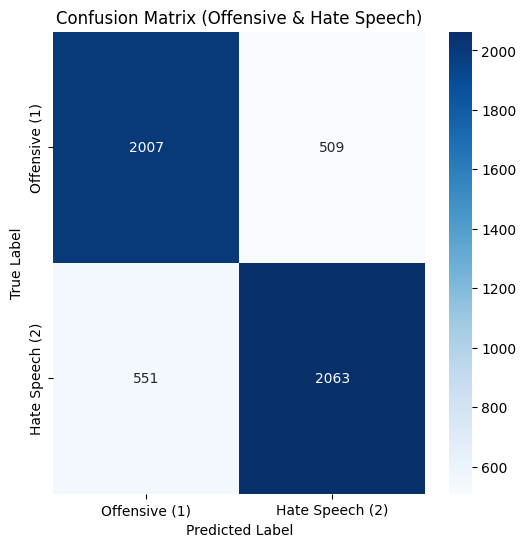

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("H_Comments.csv")
df['Type'].fillna(0, inplace=True)
df['Type'] = df['Type'].astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['Type'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Offensive (1)", "Hate Speech (2)"], title="Confusion Matrix (Offensive & Hate Speech)")
plt.show()

<ipython-input-9-7e8f7696c6d8>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].fillna(0, inplace=True)



=== TF-IDF (1-3 grams) + LIBSVM ===
Accuracy = 82.9602% (1334/1608) (classification)
Fold 1: F1 Score = 0.8005 | Accuracy = 0.8296
Accuracy = 83.3333% (1340/1608) (classification)
Fold 2: F1 Score = 0.8031 | Accuracy = 0.8333
Accuracy = 83.3955% (1341/1608) (classification)
Fold 3: F1 Score = 0.8018 | Accuracy = 0.8340
Accuracy = 83.0224% (1335/1608) (classification)
Fold 4: F1 Score = 0.8013 | Accuracy = 0.8302
Accuracy = 83.9552% (1350/1608) (classification)
Fold 5: F1 Score = 0.8080 | Accuracy = 0.8396
Accuracy = 83.209% (1338/1608) (classification)
Fold 6: F1 Score = 0.7977 | Accuracy = 0.8321
Accuracy = 83.209% (1338/1608) (classification)
Fold 7: F1 Score = 0.8036 | Accuracy = 0.8321
Accuracy = 84.0697% (1351/1607) (classification)
Fold 8: F1 Score = 0.8117 | Accuracy = 0.8407
Accuracy = 84.0697% (1351/1607) (classification)
Fold 9: F1 Score = 0.8085 | Accuracy = 0.8407
Accuracy = 82.5762% (1327/1607) (classification)
Fold 10: F1 Score = 0.7952 | Accuracy = 0.8258

Maximum F1 Sc

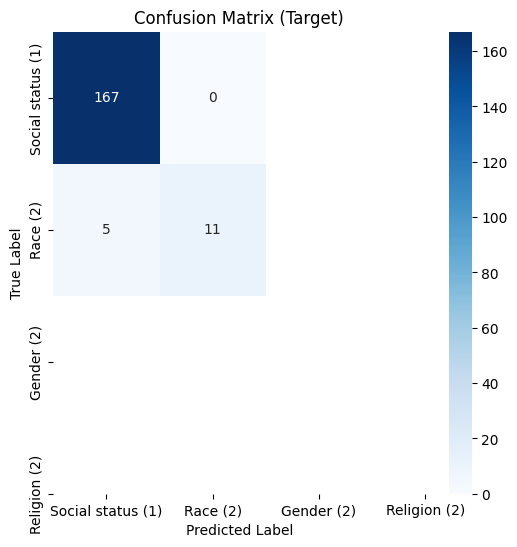

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("H_Comments.csv")
df['target'].fillna(0, inplace=True)
df['target'] = df['target'].astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['target'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Social status (1)", "Race (2)", "Gender (3)", "Religion (4)"], title="Confusion Matrix (Target)")
plt.show()

<ipython-input-15-81f4c2da2890>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(0, inplace=True)



=== TF-IDF (1-3 grams) + LIBSVM ===
Accuracy = 73.2753% (1179/1609) (classification)
Fold 1: F1 Score = 0.7142 | Accuracy = 0.7328
Accuracy = 70.0249% (1126/1608) (classification)
Fold 2: F1 Score = 0.6784 | Accuracy = 0.7002
Accuracy = 69.7139% (1121/1608) (classification)
Fold 3: F1 Score = 0.6768 | Accuracy = 0.6971
Accuracy = 71.8905% (1156/1608) (classification)
Fold 4: F1 Score = 0.6975 | Accuracy = 0.7189
Accuracy = 70.5846% (1135/1608) (classification)
Fold 5: F1 Score = 0.6850 | Accuracy = 0.7058
Accuracy = 72.1393% (1160/1608) (classification)
Fold 6: F1 Score = 0.7018 | Accuracy = 0.7214
Accuracy = 72.0771% (1159/1608) (classification)
Fold 7: F1 Score = 0.7051 | Accuracy = 0.7208
Accuracy = 71.704% (1153/1608) (classification)
Fold 8: F1 Score = 0.6985 | Accuracy = 0.7170
Accuracy = 72.6368% (1168/1608) (classification)
Fold 9: F1 Score = 0.7069 | Accuracy = 0.7264
Accuracy = 72.5124% (1166/1608) (classification)
Fold 10: F1 Score = 0.7053 | Accuracy = 0.7251

Maximum F1 S

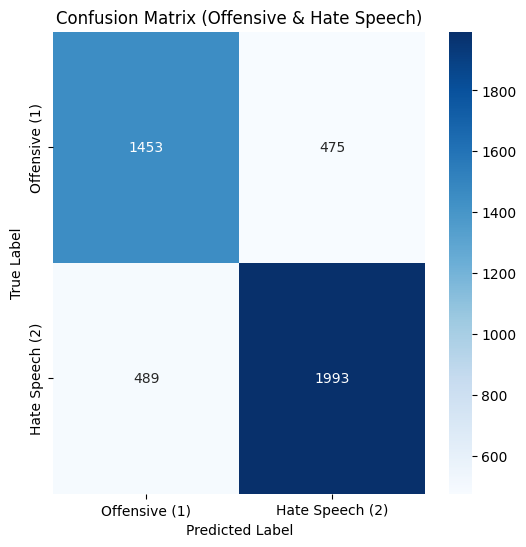

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("K_Comments.csv")
df['Type'].fillna(0, inplace=True)
df['Type'] = df['Type'].astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['Type'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Offensive (1)", "Hate Speech (2)"], title="Confusion Matrix (Offensive & Hate Speech)")
plt.show()


=== TF-IDF (1-3 grams) + LIBSVM ===
Accuracy = 82.7843% (1332/1609) (classification)
Fold 1: F1 Score = 0.8135 | Accuracy = 0.8278
Accuracy = 81.8408% (1316/1608) (classification)
Fold 2: F1 Score = 0.8063 | Accuracy = 0.8184
Accuracy = 82.2761% (1323/1608) (classification)
Fold 3: F1 Score = 0.8092 | Accuracy = 0.8228
Accuracy = 81.0945% (1304/1608) (classification)
Fold 4: F1 Score = 0.7984 | Accuracy = 0.8109
Accuracy = 82.7736% (1331/1608) (classification)
Fold 5: F1 Score = 0.8151 | Accuracy = 0.8277
Accuracy = 82.5249% (1327/1608) (classification)
Fold 6: F1 Score = 0.8163 | Accuracy = 0.8252
Accuracy = 83.4577% (1342/1608) (classification)
Fold 7: F1 Score = 0.8210 | Accuracy = 0.8346
Accuracy = 84.4527% (1358/1608) (classification)
Fold 8: F1 Score = 0.8332 | Accuracy = 0.8445
Accuracy = 82.5249% (1327/1608) (classification)
Fold 9: F1 Score = 0.8116 | Accuracy = 0.8252
Accuracy = 81.5299% (1311/1608) (classification)
Fold 10: F1 Score = 0.8013 | Accuracy = 0.8153

Maximum F1 

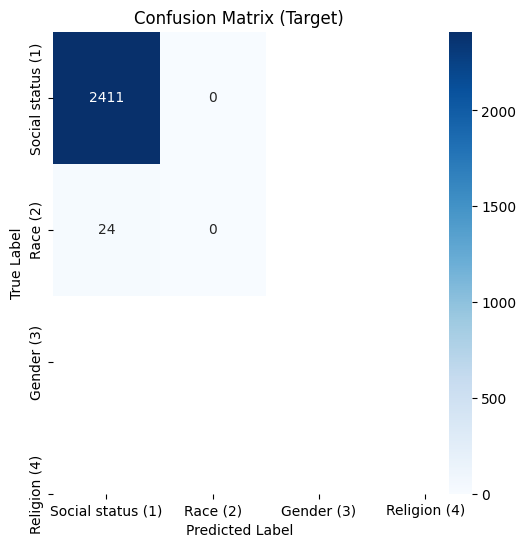

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("K_Comments.csv")
df['target'] = pd.to_numeric(df['target'], errors='coerce').fillna(0).astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['target'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Social status (1)", "Race (2)", "Gender (3)", "Religion (4)"], title="Confusion Matrix (Target)")
plt.show()

<ipython-input-5-10127bd29826>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(0, inplace=True)



=== TF-IDF (1-3 grams) + LIBSVM ===
Accuracy = 71.1801% (1146/1610) (classification)
Fold 1: F1 Score = 0.6995 | Accuracy = 0.7118
Accuracy = 70.2484% (1131/1610) (classification)
Fold 2: F1 Score = 0.6868 | Accuracy = 0.7025
Accuracy = 70.8696% (1141/1610) (classification)
Fold 3: F1 Score = 0.6941 | Accuracy = 0.7087
Accuracy = 70.4164% (1133/1609) (classification)
Fold 4: F1 Score = 0.6907 | Accuracy = 0.7042
Accuracy = 69.5463% (1119/1609) (classification)
Fold 5: F1 Score = 0.6765 | Accuracy = 0.6955
Accuracy = 71.1622% (1145/1609) (classification)
Fold 6: F1 Score = 0.6956 | Accuracy = 0.7116
Accuracy = 67.4953% (1086/1609) (classification)
Fold 7: F1 Score = 0.6546 | Accuracy = 0.6750
Accuracy = 69.6085% (1120/1609) (classification)
Fold 8: F1 Score = 0.6772 | Accuracy = 0.6961
Accuracy = 71.5973% (1152/1609) (classification)
Fold 9: F1 Score = 0.7007 | Accuracy = 0.7160
Accuracy = 69.7949% (1123/1609) (classification)
Fold 10: F1 Score = 0.6830 | Accuracy = 0.6979

Maximum F1 

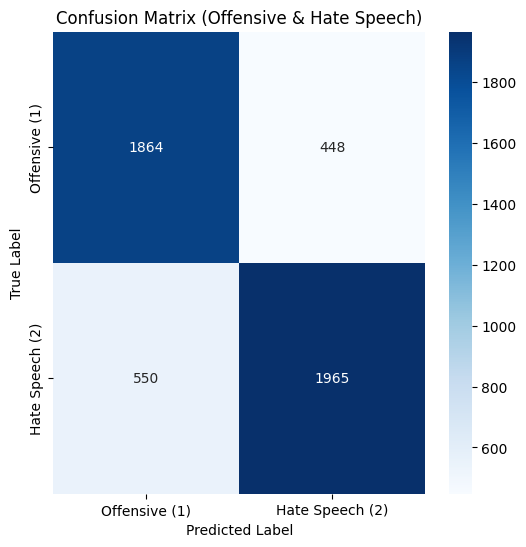

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("Y_Comments.csv")
df['Type'].fillna(0, inplace=True)
df['Type'] = df['Type'].astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['Type'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Offensive (1)", "Hate Speech (2)"], title="Confusion Matrix (Offensive & Hate Speech)")
plt.show()


=== TF-IDF (1-3 grams) + LIBSVM ===
Accuracy = 86.087% (1386/1610) (classification)
Fold 1: F1 Score = 0.8465 | Accuracy = 0.8609
Accuracy = 86.3354% (1390/1610) (classification)
Fold 2: F1 Score = 0.8479 | Accuracy = 0.8634
Accuracy = 87.0807% (1402/1610) (classification)
Fold 3: F1 Score = 0.8548 | Accuracy = 0.8708
Accuracy = 86.5755% (1393/1609) (classification)
Fold 4: F1 Score = 0.8506 | Accuracy = 0.8658
Accuracy = 87.1349% (1402/1609) (classification)
Fold 5: F1 Score = 0.8573 | Accuracy = 0.8713
Accuracy = 87.197% (1403/1609) (classification)
Fold 6: F1 Score = 0.8581 | Accuracy = 0.8720
Accuracy = 87.0106% (1400/1609) (classification)
Fold 7: F1 Score = 0.8564 | Accuracy = 0.8701
Accuracy = 85.4568% (1375/1609) (classification)
Fold 8: F1 Score = 0.8368 | Accuracy = 0.8546
Accuracy = 85.8297% (1381/1609) (classification)
Fold 9: F1 Score = 0.8427 | Accuracy = 0.8583
Accuracy = 85.7676% (1380/1609) (classification)
Fold 10: F1 Score = 0.8427 | Accuracy = 0.8577

Maximum F1 Sc

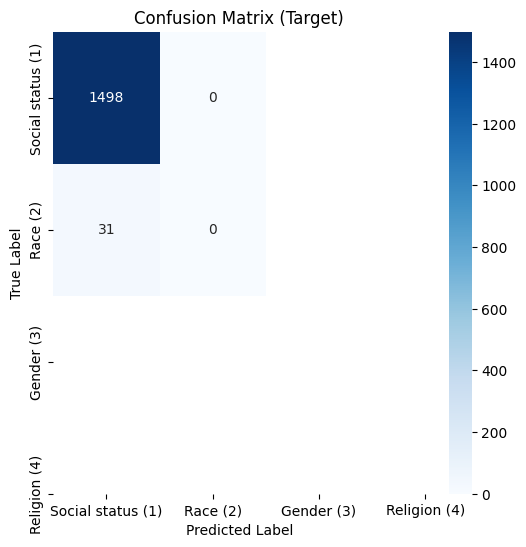

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("Y_Comments.csv")
df['Target'] = pd.to_numeric(df['Target'], errors='coerce').fillna(0).astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['Target'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Social status (1)", "Race (2)", "Gender (3)", "Religion (4)"], title="Confusion Matrix (Target)")
plt.show()

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from libsvm.svmutil import *

#load dataset
df = pd.read_csv("Y_cleaned_dataset.csv")
#extract text and lables
df.dropna(subset=['Toxicity'], inplace=True)
texts = df['Comment'].astype(str).tolist()
labels = df['Toxicity'].tolist()

# Split data
X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=20)

# ----------- Method 1: TF-IDF + LIBSVM -----------
print("\n=== TF-IDF + LIBSVM ===")

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_texts)
X_test_tfidf = vectorizer.transform(X_test_texts)

# Convert to LIBSVM format
X_train_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
X_test_tfidf_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

# Train and predict using LIBSVM
prob1 = svm_problem(y_train, X_train_tfidf_libsvm)
param1 = svm_parameter('-t 0 -c 1')  # Linear kernel
model1 = svm_train(prob1, param1)
p_label1, _, _ = svm_predict(y_test, X_test_tfidf_libsvm, model1)

# Evaluate
f1_tfidf = f1_score(y_test, p_label1)
acc_tfidf = accuracy_score(y_test, p_label1)
print(f"F1 Score (TF-IDF): {f1_tfidf:.4f}")
print(f"Accuracy (TF-IDF): {acc_tfidf:.4f}")


=== TF-IDF + LIBSVM ===
Accuracy = 70.2857% (492/700) (classification)
F1 Score (TF-IDF): 0.6994
Accuracy (TF-IDF): 0.7029


<ipython-input-2-00a61b276c12>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(0, inplace=True)



=== TF-IDF (1-3 grams) + LIBSVM ===
Accuracy = 69.7143% (244/350) (classification)
Fold 1: F1 Score = 0.6889 | Accuracy = 0.6971
Accuracy = 72.2857% (253/350) (classification)
Fold 2: F1 Score = 0.7130 | Accuracy = 0.7229
Accuracy = 70.8571% (248/350) (classification)
Fold 3: F1 Score = 0.6991 | Accuracy = 0.7086
Accuracy = 72.5714% (254/350) (classification)
Fold 4: F1 Score = 0.7194 | Accuracy = 0.7257
Accuracy = 65.4286% (229/350) (classification)
Fold 5: F1 Score = 0.6473 | Accuracy = 0.6543
Accuracy = 69.4286% (243/350) (classification)
Fold 6: F1 Score = 0.6842 | Accuracy = 0.6943
Accuracy = 65.7143% (230/350) (classification)
Fold 7: F1 Score = 0.6466 | Accuracy = 0.6571
Accuracy = 64.2857% (225/350) (classification)
Fold 8: F1 Score = 0.6360 | Accuracy = 0.6429
Accuracy = 69.1429% (242/350) (classification)
Fold 9: F1 Score = 0.6844 | Accuracy = 0.6914
Accuracy = 71.7143% (251/350) (classification)
Fold 10: F1 Score = 0.7101 | Accuracy = 0.7171

Maximum F1 Score: 0.7194
Maximu

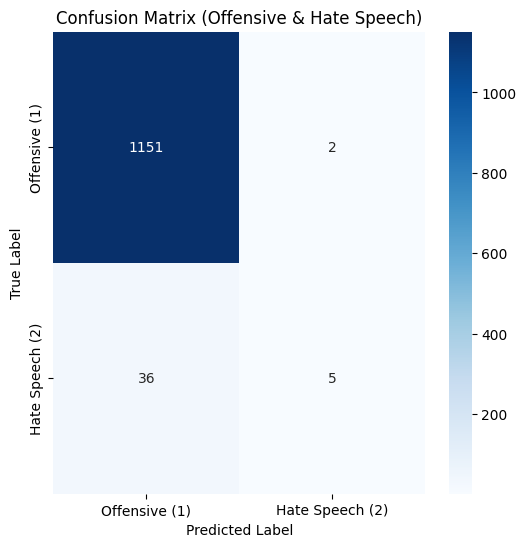

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("Y_cleaned_dataset.csv")
df['Type'].fillna(0, inplace=True)
df['Type'] = df['Type'].astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['Type'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Offensive (1)", "Hate Speech (2)"], title="Confusion Matrix (Offensive & Hate Speech)")
plt.show()


=== TF-IDF (1-3 grams) + LIBSVM ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Accuracy = 76.8571% (269/350) (classification)
Fold 1: F1 Score = 0.7583 | Accuracy = 0.7686
Accuracy = 78.2857% (274/350) (classification)
Fold 2: F1 Score = 0.7660 | Accuracy = 0.7829
Accuracy = 80.5714% (282/350) (classification)
Fold 3: F1 Score = 0.7934 | Accuracy = 0.8057
Accuracy = 79.1429% (277/350) (classification)
Fold 4: F1 Score = 0.7790 | Accuracy = 0.7914
Accuracy = 79.7143% (279/350) (classification)
Fold 5: F1 Score = 0.7855 | Accuracy = 0.7971
Accuracy = 78.8571% (276/350) (classification)
Fold 6: F1 Score = 0.7796 | Accuracy = 0.7886
Accuracy = 76.8571% (269/350) (classification)
Fold 7: F1 Score = 0.7516 | Accuracy = 0.7686
Accuracy = 79.7143% (279/350) (classification)
Fold 8: F1 Score = 0.7828 | Accuracy = 0.7971
Accuracy = 77.7143% (272/350) (classification)
Fold 9: F1 Score = 0.7637 | Accuracy = 0.7771
Accuracy = 77.4286% (271/350) (classification)
Fold 10: F1 Score = 0.7561 | Accuracy = 0.7743

Maximum F1 Score: 0.7934
Maximum Accuracy: 0.8057


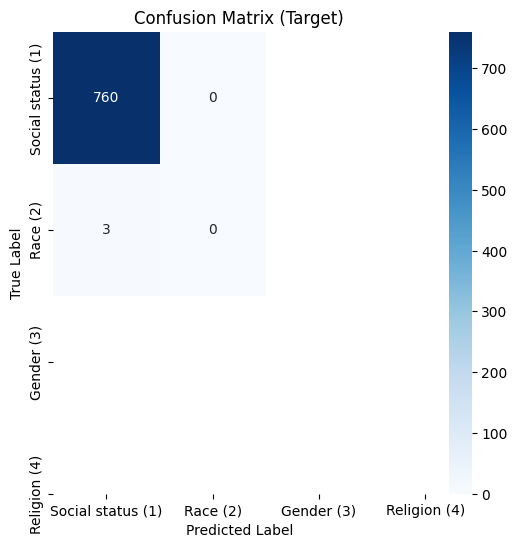

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from libsvm.svmutil import *

# Confusion matrix plot helper
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

# Load dataset
df = pd.read_csv("K_cleaneddataset.csv")
df['target'] = pd.to_numeric(df['target'], errors='coerce').fillna(0).astype(int)

texts = df['Comment'].astype(str).tolist()
labels = df['target'].tolist()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

f1_scores = []
acc_scores = []
all_true = []
all_pred = []

print("\n=== TF-IDF (1-3 grams) + LIBSVM ===")
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels), 1):
    X_train_texts = [texts[i] for i in train_idx]
    X_test_texts = [texts[i] for i in test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    # TF-IDF transformation
    X_train_tfidf = vectorizer.fit_transform(X_train_texts)
    X_test_tfidf = vectorizer.transform(X_test_texts)

    # Convert to LIBSVM format
    X_train_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_train_tfidf]
    X_test_libsvm = [dict(zip(row.indices + 1, row.data)) for row in X_test_tfidf]

    # Train and predict
    prob = svm_problem(y_train, X_train_libsvm)
    param = svm_parameter('-t 0 -c 1')
    model = svm_train(prob, param)
    p_label, _, _ = svm_predict(y_test, X_test_libsvm, model)

    # Save results
    f1 = f1_score(y_test, p_label, average='weighted')
    acc = accuracy_score(y_test, p_label)
    f1_scores.append(f1)
    acc_scores.append(acc)

    all_true.extend(y_test)
    all_pred.extend(p_label)

    print(f"Fold {fold}: F1 Score = {f1:.4f} | Accuracy = {acc:.4f}")

# Final average metrics
print(f"\nMaximum F1 Score: {np.max(f1_scores):.4f}")
print(f"Maximum Accuracy: {np.max(acc_scores):.4f}")

# Confusion Matrix (Only for classes 1 and 2)
labels_filtered = [y for y in all_true if y in [1, 2]]
preds_filtered = [p for (y, p) in zip(all_true, all_pred) if y in [1, 2]]

cnf_matrix = confusion_matrix(labels_filtered, preds_filtered, labels=[1, 2])
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=["Social status (1)", "Race (2)", "Gender (3)", "Religion (4)"], title="Confusion Matrix (Target)")
plt.show()